# PROJECT 2

## Import Necessary Libraries
pandas for data manipulation and numpy for numerical operations

In [12]:
import pandas as pd
import numpy as np

Define the read_in_chunks function to efficiently read large CSV files by splitting them into smaller chunks, which helps manage memory usage

In [ ]:
def read_in_chunks(file_path, chunk_size=10000, **kwargs):
    """Reads a CSV file in chunks and returns a list of DataFrames."""
    chunks = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size, **kwargs):
        chunks.append(chunk)
    return chunks


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Load events.csv in chunks

Specify the file paths for events.csv stored in my Google Drive.

In [ ]:
# Specify the correct path to your events.csv file
events_file_path = "/content/drive/MyDrive/Colab Notebooks/events.csv"

In [ ]:
# Read events.csv in chunks
events_chunks = read_in_chunks(events_file_path)

In [ ]:
# Concatenate chunks into a single DataFrame
events = pd.concat(events_chunks, ignore_index=True)

##Load category.csv in chunks

Specify the file paths for category_tree.csv stored in my Google Drive.

In [ ]:
# Specify the correct path to your category_tree.csv file
category_file_path = "/content/drive/MyDrive/Colab Notebooks/category_tree.csv"

In [ ]:
# Read category.csv in chunks
category_chunks = read_in_chunks(category_file_path)

In [ ]:
# Concatenate chunks into a single DataFrame
category_tree = pd.concat(category_chunks, ignore_index=True)

## Data Preprocessing for the event data

In [ ]:
# Check for duplicates in events
print("\nNumber of duplicate rows in events:", events.duplicated().sum())


Number of duplicate rows in events: 460


In [13]:
# Remove duplicates
events = events.drop_duplicates()

In [14]:
# Verify that duplicates were removed from events
print("\nNumber of duplicate rows in events after removal:", events.duplicated().sum())


Number of duplicate rows in events after removal: 0


The output showed 460 duplicate rows and these duplicate rows were then removed.
A subsequent check verifies that all the duplicates have been successfully removed, showing 0 duplicate rows.

In [15]:
# Check for missing values (NA or empty strings) in events
print("\nMissing values in events:")
print(events.isnull().sum())
print("\nEmpty strings in events:")
print((events == '').sum())



Missing values in events:
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733184
dtype: int64

Empty strings in events:
timestamp        0
visitorid        0
event            0
itemid           0
transactionid    0
dtype: int64


The code above checks for missing values (NA) and empty strings in the events DataFrame. The output indicates 2733184 missing values in the 'transactionid' column and no empty strings.


In [16]:
# Check the data type of each variable
print("\nData types in events:")
print(events.dtypes)


Data types in events:
timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
dtype: object


The data types of the columns in the events DataFrame are displayed, showing timestamp, visitorid, and itemid as int64, event as object, and transactionid as float64.


## Data Preprocessing for the category data

In [17]:
# Check for duplicates in category_tree
print("Number of duplicate rows in category_tree:", category_tree.duplicated().sum())

Number of duplicate rows in category_tree: 0


I used the code checks for duplicate rows, and the output confirms 0 duplicate rows.

In [18]:
# Check for missing values (NA or empty strings) in category_tree
print("\nMissing values in category_tree:")
print(category_tree.isnull().sum())
print("\nEmpty strings in category_tree:")
print((category_tree == '').sum())


Missing values in category_tree:
categoryid     0
parentid      25
dtype: int64

Empty strings in category_tree:
categoryid    0
parentid      0
dtype: int64


I then checked for missing values and empty strings. The output showed 25 missing values in the 'parentid' column and no empty strings.

## Data Cleaning for the Category data

### Replace the missing values in the 'parentid' column with the median value of the existing 'parentid' values.

In [19]:
# Calculate the median of 'parentid', ignoring NA values
median_parentid = category_tree['parentid'].median(skipna=True)

# Replace missing values in 'parentid' with the median
category_tree['parentid'] = category_tree['parentid'].fillna(median_parentid)

In [20]:
# Verify changes in category_tree after handling NAs
print("\nMissing values in category_tree after NA handling:")
print(category_tree.isnull().sum())


Missing values in category_tree after NA handling:
categoryid    0
parentid      0
dtype: int64


A check after handling NAs confirms 0 missing values in the category_tree DataFrame.

### Display the data types for category_tree

In [21]:
# Check the data type of each variable in category_tree
print("\nData types in category_tree:")
print(category_tree.dtypes)


Data types in category_tree:
categoryid      int64
parentid      float64
dtype: object


## Data Cleaning for the events data

### Replace the missing values in the transactionid column with 0. This is done because 'view' and 'addtocart' events do not involve a transaction, so a missing transaction ID can be interpreted as no transaction occurring.

In [22]:
# Replace the NA's in the transactions for View and Add to cart since both don't involve any transactions
# 'transactionid' is the column and we are replacing NA with 0
if 'transactionid' in events.columns:
    events['transactionid'] = events['transactionid'].fillna(0)
    print("\nMissing values in transactionid after filling:")
    print(events['transactionid'].isnull().sum())


Missing values in transactionid after filling:
0


The output confirms 0 missing values in transactionid after filling.

### Convert the visitorid and itemid to the appropriate data types (string type).

In [23]:
# Convert to appropriate data types
# 'visitorid' and 'itemid' should be strings
if 'visitorid' in events.columns:
    events['visitorid'] = events['visitorid'].astype(str)
if 'itemid' in events.columns:
    events['itemid'] = events['itemid'].astype(str)

### Convert the event column to the appropriate data type (category type) to optimize memory usage and speed up operations on this column as it contains a limited number of unique values.

In [24]:
# Convert 'event' to category
if 'event' in events.columns:
    events['event'] = events['event'].astype('category')

### Convert the data type of the timestamp column from int64 to timezone-aware datetime object.

In [25]:
# Check data type or class of the variable timestamp
print("\nData type of timestamp before conversion:")
print(events['timestamp'].dtype)


Data type of timestamp before conversion:
int64


In [26]:
# Convert to datetime
# Assuming the timestamp is in milliseconds since epoch
if 'timestamp' in events.columns:
    # Convert from milliseconds to seconds and then to datetime
    events['timestamp'] = pd.to_datetime(events['timestamp'] / 1000, unit='s', utc=True)
    print("\nData type of timestamp after conversion:")
    print(events['timestamp'].dtype)


Data type of timestamp after conversion:
datetime64[ns, UTC]


## Initial Data Visualization

### Data Visualization of the distribution of User Events before bot removal

Calculates the count of each event type (view, addtocart, transaction).

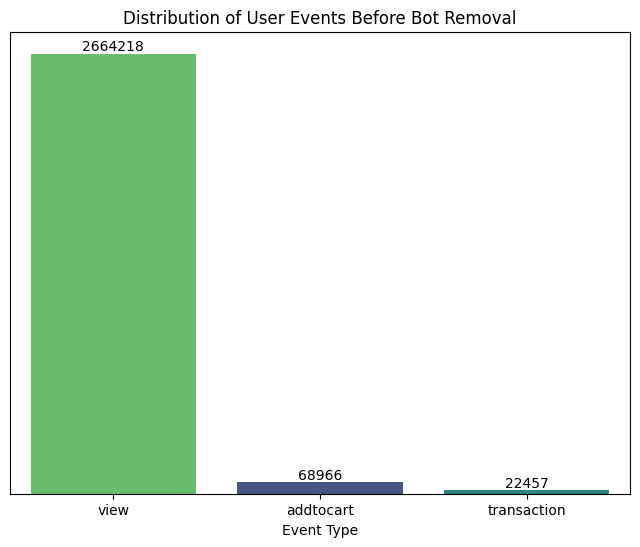

In [27]:
# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate event counts
events_counts = events.groupby('event', observed=False).size().reset_index(name='count')

# Sort event counts in descending order
events_counts = events_counts.sort_values('count', ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='event', y='count', data=events_counts, palette='viridis', hue='event', legend=False, order=events_counts['event'])

# Add labels and title
plt.title("Distribution of User Events Before Bot Removal")
plt.xlabel("Event Type")
plt.ylabel("Count")

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Remove y-axis
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Remove y-axis ticks


# Show the plot
plt.show()

 The bar chart titled "Distribution of User Events Before Bot Removal" with the counts for each event type. It is evident from the output that; 'view' events are by far the most frequent, followed by 'addtocart' and then 'transaction' events.

### Analyze event counts and conversion rates per visitor

### Group the events by visitorid and event to count how many of each event type each visitor performed.

In [28]:
# Count the number of each event per visitor
# Using groupby and unstack
user_event_counts = events.groupby(['visitorid', 'event'], observed=False).size().unstack(fill_value=0)

# Rename columns for clarity
user_event_counts = user_event_counts.rename(columns={
    'view': 'num_view',
    'addtocart': 'num_addtocart',
    'transaction': 'num_transaction'
})

# Reset index to make visitorid a column
user_event_counts = user_event_counts.reset_index()

# Display the result
print("\nEvent counts per visitor:")
display(user_event_counts.head())


Event counts per visitor:


event,visitorid,num_addtocart,num_transaction,num_view
0,0,0,0,3
1,1,0,0,1
2,10,0,0,1
3,100,0,0,4
4,1000,0,0,1


### Analyze event counts and conversion rates per visitor

conversion_view_to_add: Number of 'addtocart' events divided by the number of 'view' events.

conversion_add_to_transaction: Number of 'transaction' events divided by the number of 'addtocart' events.

conversion_view_to_transaction: Number of 'transaction' events divided by the number of 'view' events.


In [29]:
# Calculate conversion rates per visitor
user_event_counts['conversion_view_to_add'] = user_event_counts.apply(
    lambda row: row['num_addtocart'] / row['num_view'] if row['num_view'] > 0 else 0, axis=1
)
user_event_counts['conversion_add_to_transaction'] = user_event_counts.apply(
    lambda row: row['num_transaction'] / row['num_addtocart'] if row['num_addtocart'] > 0 else 0, axis=1
)
user_event_counts['conversion_view_to_transaction'] = user_event_counts.apply(
    lambda row: row['num_transaction'] / row['num_view'] if row['num_view'] > 0 else 0, axis=1
)

# Inspect the calculated conversion rates
print("\nConversion rates per visitor:")
display(user_event_counts.head())


Conversion rates per visitor:


event,visitorid,num_addtocart,num_transaction,num_view,conversion_view_to_add,conversion_add_to_transaction,conversion_view_to_transaction
0,0,0,0,3,0.0,0.0,0.0
1,1,0,0,1,0.0,0.0,0.0
2,10,0,0,1,0.0,0.0,0.0
3,100,0,0,4,0.0,0.0,0.0
4,1000,0,0,1,0.0,0.0,0.0


### Plot a histogram titled "Distribution of View-to-Add Conversion Rate".

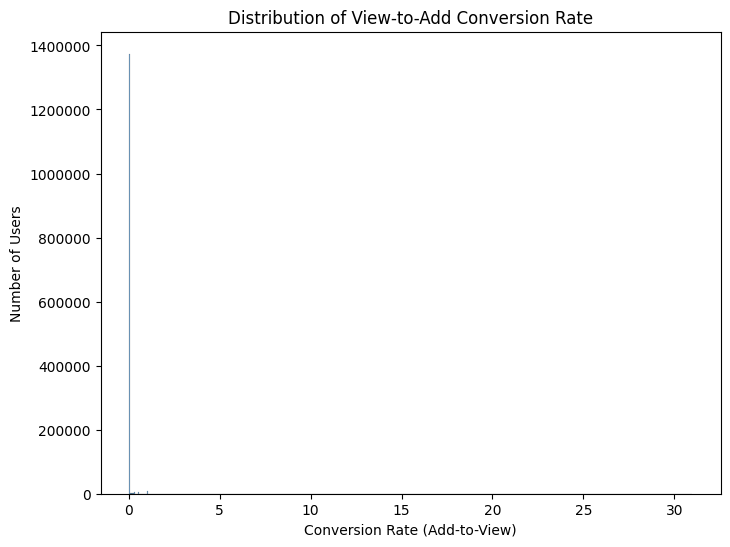

In [30]:
# Histogram for the view-to-add conversion rate
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=user_event_counts, x='conversion_view_to_add', binwidth=0.05, color="steelblue", edgecolor="black", kde=False)

# Add labels and title
plt.title("Distribution of View-to-Add Conversion Rate")
plt.xlabel("Conversion Rate (Add-to-View)")
plt.ylabel("Number of Users")

# Format y-axis to not use scientific notation
ax.ticklabel_format(style='plain', axis='y')


# Show the plot
plt.show()

The histogram is heavily skewed towards 0, indicating that most users who viewed items did not add them to their cart.

This section effectively cleans the event data and provides initial visualizations of event distributions and conversion rates at a per-user level.


## Abnormalies / Bots Detection

This section of the notebook aims to identify and remove potential bots or abnormal user behavior from the events data for Task 2.

### Sort the events DataFrame by visitorid and timestamp.

In [31]:
# Abnormalies / Bots Detection

# events are sorted by timestamp for each visitor

events = events.sort_values(by=['visitorid', 'timestamp'])

### Calculate the time difference between consecutive events for each visitor.


In [32]:
# Calculate the time difference between consecutive events for each visitor
events['time_diff'] = events.groupby('visitorid')['timestamp'].diff().dt.total_seconds()

# Display the first few rows with the new column
print("\nEvents data with time difference:")
display(events.head())


Events data with time difference:


,timestamp,visitorid,event,itemid,transactionid,time_diff
1361687,2015-09-11 20:49:49.438999891+00:00,0,view,285930,0.0,NaN
1367212,2015-09-11 20:52:39.591000080+00:00,0,view,357564,0.0,170.152
1367342,2015-09-11 20:55:17.174999952+00:00,0,view,67045,0.0,157.584
830385,2015-08-13 17:46:06.444000006+00:00,1,view,72028,0.0,NaN
679561,2015-08-04 18:30:29.611000061+00:00,10,view,248766,0.0,NaN


A new column time_diff is created, which calculates the time difference in seconds between consecutive events for each visitor. The groupby('visitorid')['timestamp'].diff().dt.total_seconds() part calculates this difference within each visitor group. The output displays the first few rows of the events DataFrame with the new time_diff column. There is NaN for the first event of each visitor because there is no previous event to calculate the difference from.


### Aggregates statistics per visitor

Group the data by visitorid and calculate:

total_events: The total number of events for each visitor.
avg_time_diff: The average time difference between events for each visitor.

median_time_diff: The median time difference between events for each visitor.

In [33]:
# Aggregate statistics per visitor: total events, median time difference, etc.
visitor_stats = events.groupby('visitorid').agg(
    total_events=('visitorid', 'size'),
    avg_time_diff=('time_diff', lambda x: x.mean() if len(x) > 1 else 0),
    median_time_diff=('time_diff', lambda x: x.median() if len(x) > 1 else 0)
).reset_index()

# Display the result
print("\nVisitor statistics:")
display(visitor_stats.head())


Visitor statistics:


,visitorid,total_events,avg_time_diff,median_time_diff
0,0,3,163.868000,163.868
1,1,1,0.000000,0.000
2,10,1,0.000000,0.000
3,100,4,79.631333,52.751
4,1000,1,0.000000,0.000


The output shows the visitor_stats DataFrame with these aggregated metrics for the first few visitors.

Potential bots will then be identified using a rule-based approach

Thresholds are calculated for total_events (95th percentile) and avg_time_diff (5th percentile). The idea is that users with an unusually high number of events or very short time gaps between events might be bots.

In [34]:
# Identify potential bots:
# Flag users with unusually high total events or very low average time difference.
# These thresholds may need tuning based the data.
# Calculate thresholds while removing NA values
bot_threshold_events = visitor_stats['total_events'].quantile(0.95)   # Top 5% activity
bot_threshold_time = visitor_stats['avg_time_diff'].quantile(0.05)      # Bottom 5% time gaps

A bot_flag column is created in visitor_stats, set to True if a user's total_events is above the calculated threshold or their avg_time_diff is below the threshold.

In [35]:
# Flag potential bots
visitor_stats['bot_flag'] = (visitor_stats['total_events'] > bot_threshold_events) | (visitor_stats['avg_time_diff'] < bot_threshold_time)

Inspect the flagged potential bots

In [36]:
# Inspect flagged potential bots
potential_bots = visitor_stats[visitor_stats['bot_flag'] == True]
print(potential_bots)

        visitorid  total_events  avg_time_diff  median_time_diff  bot_flag
5           10000             7   1.847928e+05           56.5890      True
69        1000057             9   3.187799e+05         3441.5765      True
105        100009             9   9.910238e+02           50.9905      True
109       1000093            18   1.414759e+05          125.8170      True
156       1000135            11   1.163557e+04         3643.8600      True
...           ...           ...            ...               ...       ...
1407502    999929             7   1.074600e+01            8.8050      True
1407520    999945            16   9.440833e+01           38.4100      True
1407527    999951             8   1.272999e+06        15624.6630      True
1407547     99997             6   4.691134e+02           67.1430      True
1407576    999996             6   2.863943e+05        88943.6500      True

[58627 rows x 5 columns]


In [37]:
# Print number of potential bots
print(f"Number of potential bots: {len(potential_bots)}")

Number of potential bots: 58627


Display the top ten bots by total events

In [38]:
# Show top ten bots
top_ten_bots = potential_bots.sort_values(by='total_events', ascending=False).head(10)
print(top_ten_bots)

        visitorid  total_events  avg_time_diff  median_time_diff  bot_flag
166767    1150086          7757    1086.141548          107.5970      True
885982     530559          4328    1863.020505           99.2970      True
466431     152963          3024    1378.517402          118.0220      True
1292024    895999          2474    4698.376979          221.8580      True
478207     163561          2410    1124.994173           68.3610      True
709368     371606          2345     887.976731           81.0525      True
614934     286616          2252    1092.484758           61.6900      True
1057043    684514          2246    1388.017212           90.6700      True
1287598    892013          2024    2517.205252           22.7620      True
1253470    861299          1991    1131.611189          107.8215      True


### Employ Isolation Forest, an unsupervised machine learning algorithm, for anomaly detection

Features (total_events, avg_time_diff, and median_time_diff) are selected from the visitor_stats DataFrame

In [39]:
# Isolation Forest for Anomaly Detection

# Prepare features for the Isolation Forest model.
# Use the aggregated metrics: total_events, avg_time_diff, and median_time_diff.
features = visitor_stats[['total_events', 'avg_time_diff', 'median_time_diff']]

The data types of these features are checked to ensure they are numeric.

In [40]:
# Check structure of features to ensure all columns are numeric
print(features.dtypes)

total_events          int64
avg_time_diff       float64
median_time_diff    float64
dtype: object


### The Isolation Forest model is initialized and fitted to these features.

In [41]:
# Initialize and fit the Isolation Forest model.
from sklearn.ensemble import IsolationForest

# Initialize the Isolation Forest model
# n_estimators is equivalent to ntrees
# random_state is equivalent to seed
# max_samples='auto' is often used and is related to sample_size
iso_model = IsolationForest(n_estimators=100, random_state=42)

# Fit the model to the features
iso_model.fit(features)

IsolationForest(random_state=42)

Anomaly scores are calculated for each user using the fitted model. Lower scores indicate a higher degree of anomaly.

In [42]:
# Get anomaly scores which indicate the degree of anomaly for each user.
# Lower values indicate a higher degree of anomaly.
anomaly_scores = iso_model.decision_function(features)

In [43]:
# Check the structure and content of anomaly_scores.
print(type(anomaly_scores))
print(anomaly_scores.shape)
print(anomaly_scores[:5]) # Display the first 5 elements

<class 'numpy.ndarray'>
(1407580,)
[0.14151684 0.17164049 0.17164049 0.12905598 0.17164049]


Add the anomaly_scores as a new column to the visitor_stats DataFrame.

In [44]:
# Add the anomaly scores as a new column to the visitor_stats DataFrame.
# If anomaly_scores is a NumPy array, ensure its length matches visitor_stats.
if len(anomaly_scores) == len(visitor_stats):
    visitor_stats['anomaly_score'] = anomaly_scores
else:
    print("Error: Length of anomaly scores does not match visitor_stats DataFrame.")

An anomaly threshold is defined below as the 99th percentile of the anomaly scores. Users with a score above this threshold are flagged as anomalies with -1 in the anomaly_flag column, while others are flagged as 1.

In [45]:
# Define an anomaly threshold: Flag users whose anomaly score is in the top 1% as anomalies.
# In scikit-learn's Isolation Forest, lower scores are more anomalous.
# we use the 99th percentile of the scikit-learn scores and flag scores > threshold.
anomaly_threshold = visitor_stats['anomaly_score'].quantile(0.99)
visitor_stats['anomaly_flag'] = visitor_stats['anomaly_score'].apply(lambda x: -1 if x > anomaly_threshold else 1)

Display the updated visitor_stats DataFrame with the anomaly_score and anomaly_flag column.

In [46]:
# Check the updated visitor_stats
print(visitor_stats.head())

  visitorid  total_events  avg_time_diff  median_time_diff  bot_flag  \
0         0             3     163.868000           163.868     False   
1         1             1       0.000000             0.000     False   
2        10             1       0.000000             0.000     False   
3       100             4      79.631333            52.751     False   
4      1000             1       0.000000             0.000     False   

   anomaly_score  anomaly_flag  
0       0.141517             1  
1       0.171640             1  
2       0.171640             1  
3       0.129056             1  
4       0.171640             1  


 Combine the two detection criteria (rule-based and Isolation Forest) to create a final bot flag

The thresholds for the rule-based detection are recalculated below.

In [47]:
# STEP 6: Combine Detection Criteria
# Define thresholds for rule-based bot detection
bot_threshold_events = visitor_stats['total_events'].quantile(0.95)
bot_threshold_time = visitor_stats['avg_time_diff'].quantile(0.05)

### A bot_flag_rule column is created based on these thresholds.

In [48]:
# Create the bot_flag_rule column based on the thresholds
visitor_stats['bot_flag_rule'] = (visitor_stats['total_events'] > bot_threshold_events) | (visitor_stats['avg_time_diff'] < bot_threshold_time)

In [49]:
rule_bot_id = visitor_stats[visitor_stats['bot_flag_rule'] == True]
print(f"Number of bots detected with rule-based bot deetection: {len(rule_bot_id)}")

Number of bots detected with rule-based bot deetection: 58627


### Create a final_bot_flag column and set it to True if either the bot_flag_rule is True or the anomaly_flag is -1.

In [50]:
# Define a final flag for bots:
# A visitor is flagged as a bot if they meet either the rule-based criteria or the Isolation Forest criteria.
visitor_stats['final_bot_flag'] = (visitor_stats['bot_flag_rule'] == True) | (visitor_stats['anomaly_flag'] == -1)

In [51]:
# Identify the final list of bot users.
bot_users = visitor_stats[visitor_stats['final_bot_flag'] == True]
print(f"Number of bots detected (combined): {len(bot_users)}")

Number of bots detected (combined): 58627


The number of users flagged as bots by this combined approach is printed as (58627 bots detected)

### Clean the events DataFrame by removing the events associated with the flagged bot users

In [52]:
# STEP 7: Filter Out Bot Users from Events Data

# Remove all events associated with flagged bot users.
# Get the list of visitorids for bot users
bot_visitor_ids = bot_users['visitorid'].tolist()

# Filter out events where visitorid is in the list of bot_visitor_ids
cleaned_events = events[~events['visitorid'].isin(bot_visitor_ids)]

In [53]:
# Check how many unique users remain.
print(f"Remaining unique users after bot removal: {cleaned_events['visitorid'].nunique()}")

Remaining unique users after bot removal: 1348953


The number of unique users remaining after the bot removal is 1348953 unique users, indicating a significant reduction in the number of users.


## Generate Visualizations After Bot Removal

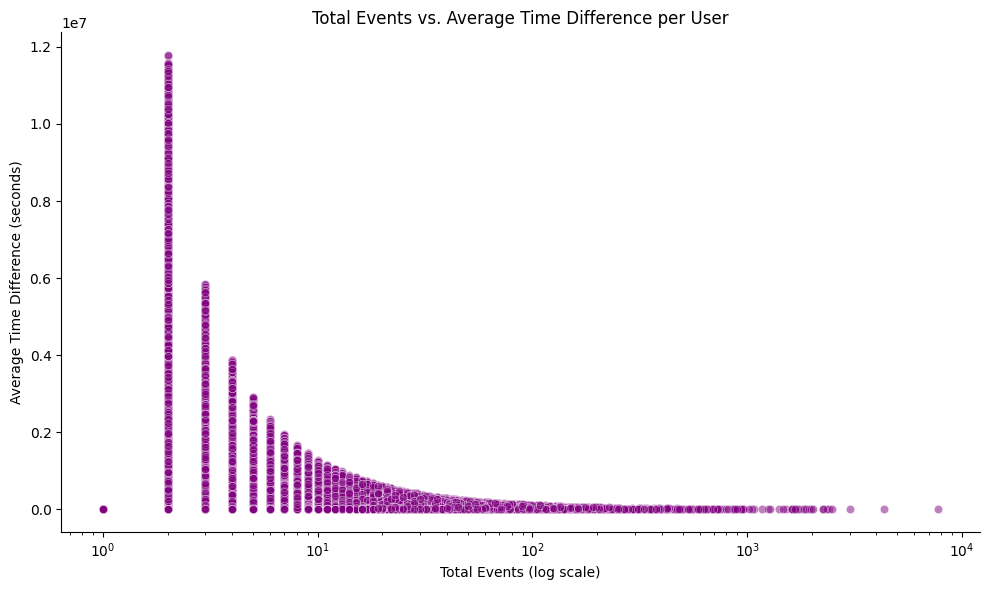

In [54]:
# Scatter Plot of User Activity versus Time Difference

# Assuming visitor_stats already contains total_events and avg_time_diff
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visitor_stats, x='total_events', y='avg_time_diff', alpha=0.5, color="purple")

# Log scale if there's a wide range in total_events
plt.xscale('log')

# Add labels and title
plt.title("Total Events vs. Average Time Difference per User")
plt.xlabel("Total Events (log scale)")
plt.ylabel("Average Time Difference (seconds)")

# Use a more minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

The scatter plot of total_events versus avg_time_diff per user is created. The x-axis is on a log scale due to the wide range of total events. The output shows this scatter plot, which can help visualize the distribution of user activity and time differences.

## A bar plot of the distribution of user events is generated again using the cleaned_events data

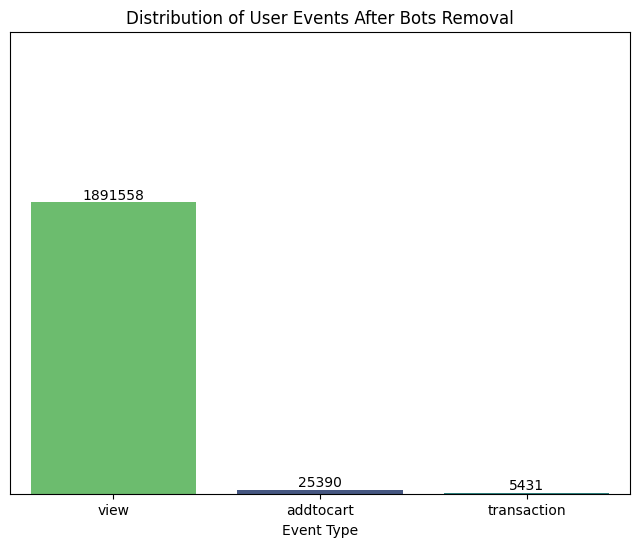

In [55]:
# Data Visualisation after Anomaly Detection

# Calculate event counts
event_counts = cleaned_events.groupby('event', observed=False).size().reset_index(name='count')

# Sort event counts in descending order
event_counts = event_counts.sort_values('count', ascending=False)

# Create the bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='event', y='count', data=event_counts, palette='viridis', hue='event', legend=False, order=event_counts['event'])

# Add labels and title
plt.title("Distribution of User Events After Bots Removal")
plt.xlabel("Event Type")
plt.ylabel("Count")

# Set y-axis limit
plt.ylim(0, 3000000)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Remove y-axis
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Remove y-axis ticks

# Show the plot
plt.show()

The output shows a bar chart similar to the earlier one but with potentially lower counts for each event type after removing bot activity.

## Identify The Top 10 Most Viewed Products

This is done by filtering for 'view' events in cleaned_events, counting views per itemid, and selecting the top 10.

In [56]:
# Filter the events data for view events only
view_events = cleaned_events[cleaned_events['event'] == "view"]

# Aggregate the number of views per product (itemid)
product_view_counts = view_events.groupby('itemid').size().reset_index(name='view_count')

# Order by view_count in descending order
product_view_counts = product_view_counts.sort_values(by='view_count', ascending=False)

# Select the top 10 most viewed products
top_viewed_products = product_view_counts.head(10)

# Display the result
print("\nTop 10 Most Viewed Products:")
display(top_viewed_products)


Top 10 Most Viewed Products:


,itemid,view_count
45382,187946,3318
193766,5411,2127
140082,370653,1707
102421,298009,1546
215929,96924,1518
61692,219512,1295
187247,461686,1273
122116,335975,1238
26641,151444,1192
176924,441668,1175


## Data Visualization The Top 10 Most Viewed Products

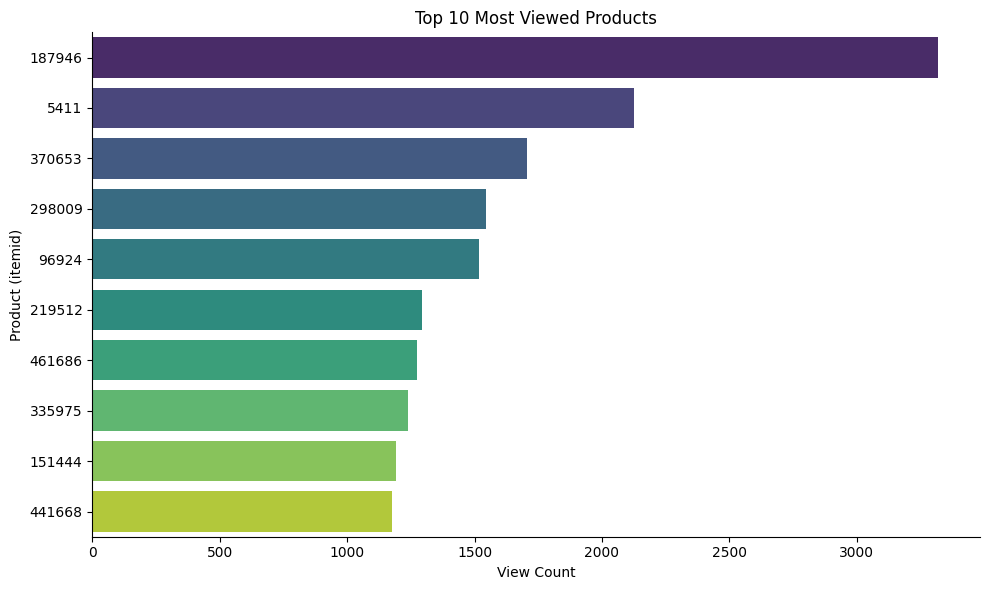

In [57]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='view_count', y='itemid', data=top_viewed_products, palette='viridis', hue='itemid', legend=False)

# Add labels and title
plt.title("Top 10 Most Viewed Products")
plt.xlabel("View Count")
plt.ylabel("Product (itemid)")

# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

## Identify The Top 10 Most Purchased Products

This is done by filtering for 'transaction' events in cleaned_events, counting purchases per itemid, and selecting the top 10

In [58]:
# Filter the events data for transaction events only
purchase_events = cleaned_events[cleaned_events['event'] == "transaction"]

# Aggregate the number of purchases per product (itemid)
product_purchase_counts = purchase_events.groupby('itemid').size().reset_index(name='purchase_count')

# Order by purchase_count in descending order
product_purchase_counts = product_purchase_counts.sort_values(by='purchase_count', ascending=False)

# Select the top 10 most purchased products
top_purchased_products = product_purchase_counts.head(10)

## Data Visualisation on Top 10 Most Purchased Products

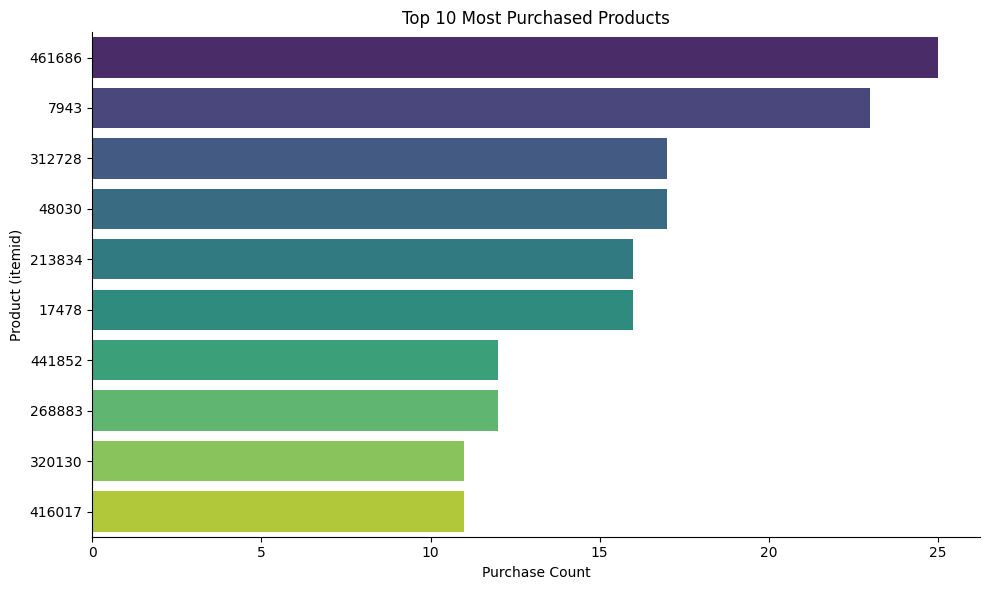

In [59]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='purchase_count', y='itemid', data=top_purchased_products, palette='viridis', hue='itemid', legend=False)

# Add labels and title
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Purchase Count")
plt.ylabel("Product (itemid)")

# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

The bar chart shows the top 10 purchased products visualizing their purchase counts.

## Aggregate event counts for 'view', 'addtocart', and 'transaction' events in the cleaned_events data.

In [60]:
# Aggregate counts for each event type
funnel_data_counts = cleaned_events['event'].value_counts().reset_index()
funnel_data_counts.columns = ['event', 'count']

# Define the order of stages for the funnel
stage_order = ['view', 'addtocart', 'transaction']

# Reindex to ensure all stages are present and in the correct order, filling missing with 0
funnel_data = funnel_data_counts.set_index('event').reindex(stage_order).reset_index()
funnel_data = funnel_data.fillna(0) # Fill any missing counts with 0

# Display the aggregated data
print("Aggregated funnel data:")
display(funnel_data)

Aggregated funnel data:


,event,count
0,view,1891558
1,addtocart,25390
2,transaction,5431


In [61]:
# Aggregate counts for each event type from the cleaned events data
funnel_data = cleaned_events.groupby('event', observed=False).size().reset_index(name='count')

# Define the order of stages for the funnel (equivalent of factor levels)
stage_order = ["view", "addtocart", "transaction"]

# Reindex to ensure all stages are present and in the correct order, filling missing with 0
funnel_data = funnel_data.set_index('event').reindex(stage_order).reset_index()
funnel_data = funnel_data.fillna(0) # Fill any missing counts with 0

print("Aggregated funnel data:")
display(funnel_data)

Aggregated funnel data:


,event,count
0,view,1891558
1,addtocart,25390
2,transaction,5431


## Visualisation of Conversion Funnel

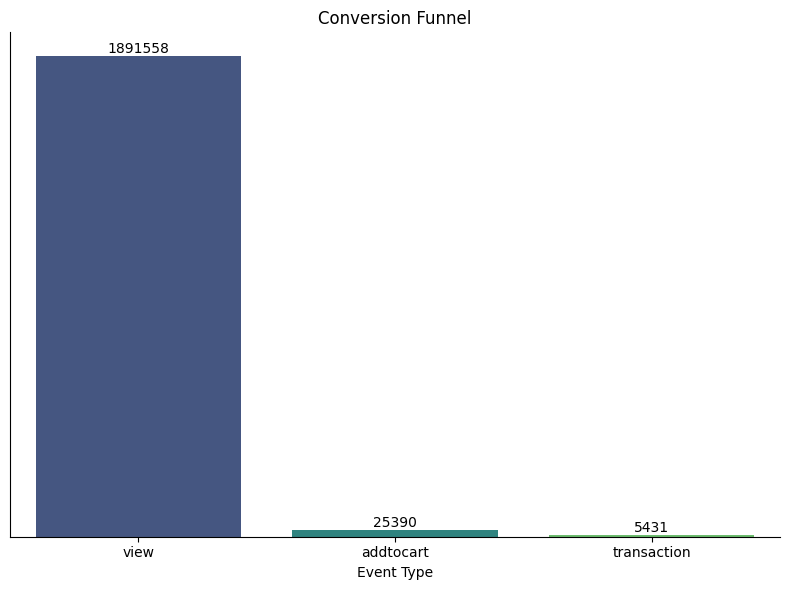

In [62]:
# Plot the conversion funnel
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='event', y='count', data=funnel_data, palette='viridis', hue='event', legend=False)

# Add labels and title
plt.title("Conversion Funnel")
plt.xlabel("Event Type")
plt.ylabel("Count")

# Remove y-axis
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Remove y-axis ticks

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

In [63]:
# Data Visualisation on Time Series of Events Over Time

# Aggregate events by day
daily_events = cleaned_events.copy() # Create a copy to avoid modifying the original DataFrame
daily_events['date'] = daily_events['timestamp'].dt.date
daily_events = daily_events.groupby('date').size().reset_index(name='total_events')

# Convert date column to datetime objects for plotting
daily_events['date'] = pd.to_datetime(daily_events['date'])

# Display the aggregated data
print("Aggregated daily events:")
display(daily_events.head())

Aggregated daily events:


,date,total_events
0,2015-05-03,9559
1,2015-05-04,13454
2,2015-05-05,15774
3,2015-05-06,16337
4,2015-05-07,15331


In [64]:
# Aggregate events by month
monthly_events = cleaned_events.copy() # Create a copy to avoid modifying the original DataFrame
# Converting to PeriodArray/Index representation will drop timezone information,
# which is expected and acceptable for monthly aggregation and plotting.
monthly_events['month'] = monthly_events['timestamp'].dt.to_period('M')
monthly_events = monthly_events.groupby('month').size().reset_index(name='total_events')

# Convert month column to datetime objects for plotting
monthly_events['month'] = monthly_events['month'].dt.to_timestamp()

# Display the aggregated data
print("Aggregated monthly events:")
display(monthly_events.head())

Aggregated monthly events:


/tmp/ipython-input-2058263729.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_events['month'] = monthly_events['timestamp'].dt.to_period('M')


,month,total_events
0,2015-05-01,404186
1,2015-06-01,409676
2,2015-07-01,485339
3,2015-08-01,400085
4,2015-09-01,223093


## Data Visualisation of Monthly Events Over Time

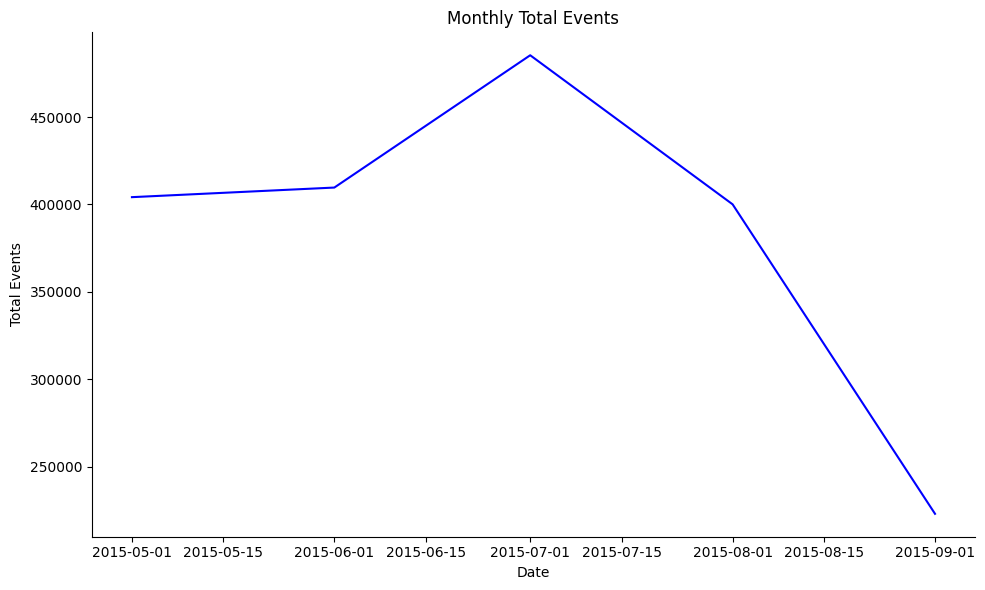

In [65]:
# Plot the monthly events as a time series
plt.figure(figsize=(10, 6))
plt.plot(monthly_events['month'], monthly_events['total_events'], color='blue')

# Add labels and title
plt.title("Monthly Total Events")
plt.xlabel("Date")
plt.ylabel("Total Events")

# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

In [66]:
# Data Visualisation on Relationship Between Overall Activity and Conversion Rates

visitor_stats_cleaned = cleaned_events.groupby('visitorid').agg(
    num_view=('event', lambda x: (x == 'view').sum()),
    num_addtocart=('event', lambda x: (x == 'addtocart').sum()),
    total_events=('visitorid', 'size'),
    avg_time_diff=('time_diff', lambda x: x.mean() if len(x) > 1 else 0),
    median_time_diff=('time_diff', lambda x: x.median() if len(x) > 1 else 0)
).reset_index()

# Calculate conversion_view_to_add, handling division by zero and setting to NaN
visitor_stats_cleaned['conversion_view_to_add'] = np.where(
    visitor_stats_cleaned['num_view'] > 0,
    visitor_stats_cleaned['num_addtocart'] / visitor_stats_cleaned['num_view'],
    np.nan # Use NaN for cases where num_view is 0
)

# Display the first few rows to verify
print("Visitor statistics from cleaned data:")
display(visitor_stats_cleaned.head())

Visitor statistics from cleaned data:


,visitorid,num_view,num_addtocart,total_events,avg_time_diff,median_time_diff,conversion_view_to_add
0,0,3,0,3,163.868000,163.868,0.0
1,1,1,0,1,0.000000,0.000,0.0
2,10,1,0,1,0.000000,0.000,0.0
3,100,4,0,4,79.631333,52.751,0.0
4,1000,1,0,1,0.000000,0.000,0.0


In [67]:
# Check that the column exists
print(visitor_stats_cleaned.columns)
# Expected output now includes "conversion_view_to_add"

Index(['visitorid', 'num_view', 'num_addtocart', 'total_events',
       'avg_time_diff', 'median_time_diff', 'conversion_view_to_add'],
      dtype='object')


## Visualization of the relationship between overall activity (total_events) and conversion rate (conversion_view_to_add)

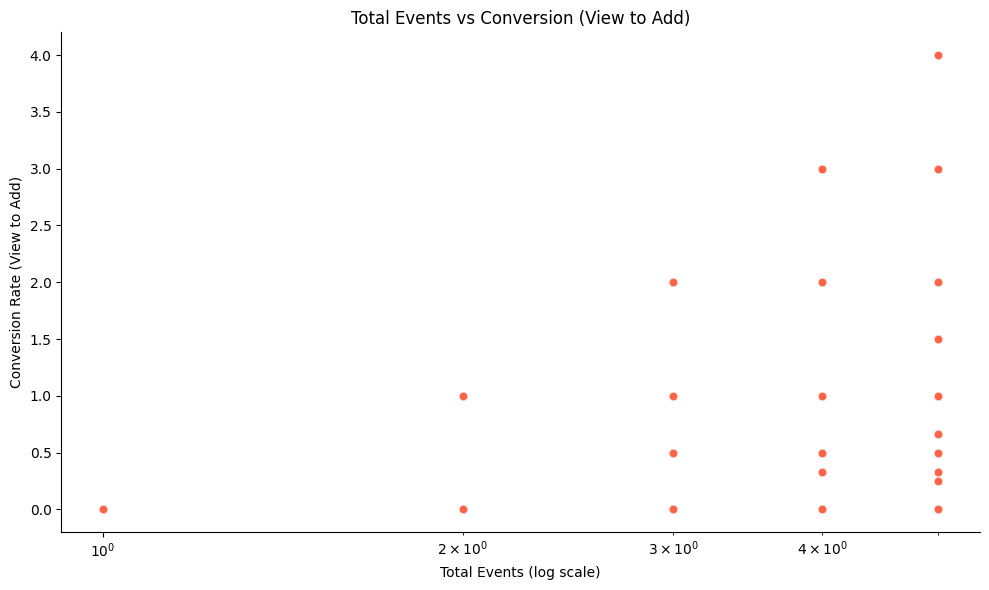

In [68]:
# Plot the relationship between total events and conversion rate
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visitor_stats_cleaned, x='total_events', y='conversion_view_to_add', alpha=0.5, color="tomato")

# Log scale for total_events
plt.xscale('log')

# Add labels and title
plt.title("Total Events vs Conversion (View to Add)")
plt.xlabel("Total Events (log scale)")
plt.ylabel("Conversion Rate (View to Add)")

# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

## Heatmap of Event Activity by Hour and Day of Week

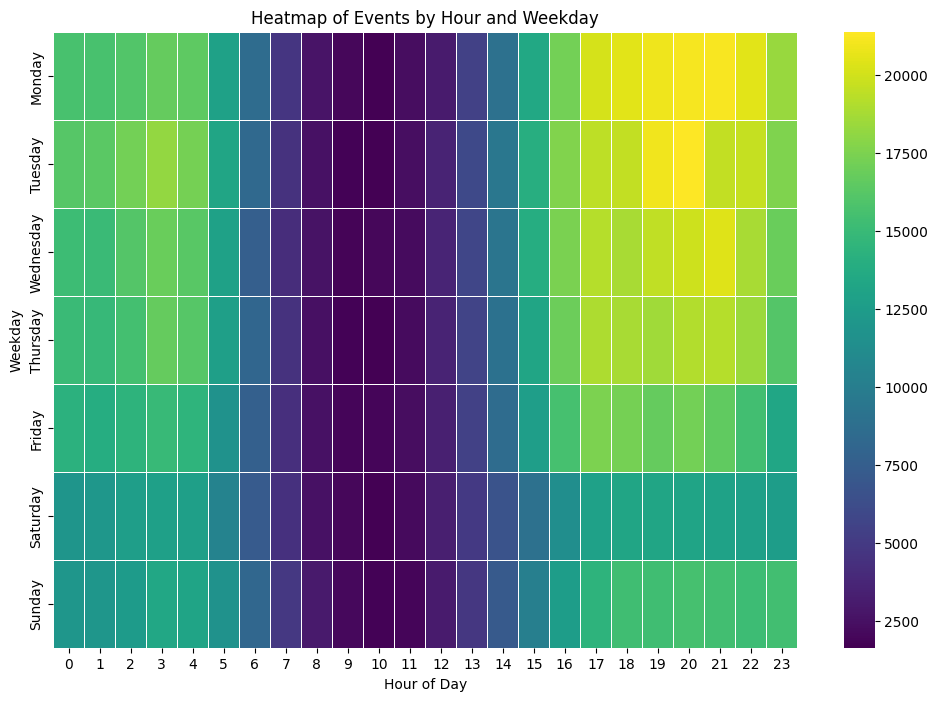

In [69]:
# Create a copy to avoid SettingWithCopyWarning
cleaned_events_copy = cleaned_events.copy()

# Extract hour and day of week from datetime
cleaned_events_copy['hour'] = cleaned_events_copy['timestamp'].dt.hour
cleaned_events_copy['weekday'] = cleaned_events_copy['timestamp'].dt.day_name()

# Aggregate event counts by hour and weekday
heatmap_data = cleaned_events_copy.groupby(['weekday', 'hour'], observed=False).size().reset_index(name='count')

# Reorder weekdays for proper display (optional, for proper ordering)
weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data['weekday'] = pd.Categorical(heatmap_data['weekday'], categories=weekday_order, ordered=True)
heatmap_data = heatmap_data.sort_values('weekday')

# Pivot the data for heatmap
heatmap_matrix = heatmap_data.pivot_table(index='weekday', columns='hour', values='count', fill_value=0, observed=False)

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, cmap='viridis', annot=False, fmt='d', linewidths=.5) # annot=True if you want counts on the heatmap

# Add labels and title
plt.title("Heatmap of Events by Hour and Weekday")
plt.xlabel("Hour of Day")
plt.ylabel("Weekday")

# Show the plot
plt.show()

## Load item_properties_part1.1.csv in chunks

Specify the file paths for events.csv stored in my Google Drive.

In [70]:
# Specify the correct path to your item_properties_part1.1.csv file
events_file_path1 = "/content/drive/MyDrive/Colab Notebooks/item_properties_part1.1.csv"

In [71]:
# Read item_properties_part1.csv in chunks
item_properties_1_chunks = read_in_chunks(events_file_path1)

In [72]:
# Concatenate chunks into a single DataFrame
item_properties_1 = pd.concat(item_properties_1_chunks, ignore_index=True)

## Load item_properties_part2.csv in chunks

Specify the file paths for events.csv stored in my Google Drive.

In [73]:
# Specify the correct path to item_properties_part2.csv file
events_file_path2 = "/content/drive/MyDrive/Colab Notebooks/item_properties_part2.csv"

In [74]:
# Read item_properties_part1.csv in chunks
item_properties_2_chunks = read_in_chunks(events_file_path2)

In [75]:
# Concatenate chunks into a single DataFrame
item_properties_2 = pd.concat(item_properties_2_chunks, ignore_index=True)

## Data Preprocessing for the item_properties data

In [76]:
# Bind item properties 1 & 2 in a data frame
item_properties = pd.concat([item_properties_1, item_properties_2], ignore_index=True)

In [77]:
# Display the first few rows to verify the changes
item_properties.head(5)

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


## Data Cleaning for item properties

Check for duplicates in item_properties

In [78]:
# Data Cleaning for item properties
# Check for duplicates in item_properties
print("Number of duplicate rows in item_properties:", item_properties.duplicated().sum())

Number of duplicate rows in item_properties: 0


Check for missing values (NA) and empty string

In [79]:
# Check for NA's in item properties
print("\nMissing values in item_properties:")
print(item_properties.isnull().sum())
print("\nEmpty strings in item_properties:")
print((item_properties == '').sum())


Missing values in item_properties:
timestamp    0
itemid       0
property     0
value        0
dtype: int64

Empty strings in item_properties:
timestamp    0
itemid       0
property     0
value        0
dtype: int64


Convert the data type of the timestamp column from int64 to timezone-aware datetime object.

In [80]:
# Convert to datetime
# Assuming the timestamp is in milliseconds since epoch
if 'timestamp' in item_properties.columns:
    item_properties['timestamp'] = pd.to_datetime(item_properties['timestamp'] / 1000, unit='s', utc=True)
    print("\nData type of timestamp after conversion:")
    print(item_properties['timestamp'].dtype)


Data type of timestamp after conversion:
datetime64[ns, UTC]


In [81]:
cleaned_events.head()

,timestamp,visitorid,event,itemid,transactionid,time_diff
1361687,2015-09-11 20:49:49.438999891+00:00,0,view,285930,0.0,NaN
1367212,2015-09-11 20:52:39.591000080+00:00,0,view,357564,0.0,170.152
1367342,2015-09-11 20:55:17.174999952+00:00,0,view,67045,0.0,157.584
830385,2015-08-13 17:46:06.444000006+00:00,1,view,72028,0.0,NaN
679561,2015-08-04 18:30:29.611000061+00:00,10,view,248766,0.0,NaN


## Merge cleaned_events and item_properties and reorder to form the events_items DataFrame.

In [82]:
# Merging cleaned_events and item_properties

# Ensure cleaned_events is a copy to avoid SettingWithCopyWarning
cleaned_events = cleaned_events.copy()

# Convert itemid to string in both DataFrames using .loc
cleaned_events.loc[:, 'itemid'] = cleaned_events['itemid'].astype(str)
item_properties['itemid'] = item_properties['itemid'].astype(str)

# Perform a left join to match each event with item properties
merged_df = pd.merge(cleaned_events, item_properties, on='itemid', how='left', suffixes=('_event', '_prop'))

# Filter to keep only property timestamps that are less than or equal to the event timestamp
merged_df_filtered = merged_df[merged_df['timestamp_prop'] <= merged_df['timestamp_event']].copy()

# Within each event group, find the property entry with the maximum timestamp (most recent)
# Use observed=True to handle potential empty groups from unobserved categories
latest_property_for_event = merged_df_filtered.loc[merged_df_filtered.groupby(
    ['timestamp_event', 'visitorid', 'event', 'itemid', 'transactionid'], observed=True
)['timestamp_prop'].idxmax()]

# Rename columns for clarity after the merge
events_items = latest_property_for_event.rename(columns={
    'timestamp_event': 'timestamp',
    'timestamp_prop': 'property_timestamp'
})

# Select and reorder columns to match the expected structure
events_items = events_items[['timestamp', 'visitorid', 'event', 'itemid', 'transactionid', 'property_timestamp', 'property', 'value']]

## Replace the value in the property column with the corresponding value from the value column for rows where the property is 'categoryid'

In [83]:
# Replace the categoryid in the property column with it corresponding value

# Update the 'property' column in events_items
# events_items[property == "categoryid", property := value]

# In the events_items data frame, update the 'property' column.
# For rows where 'property' equals "categoryid", replace it with the corresponding value from the 'value' column.
# Otherwise, keep the original 'property' value.
events_items['property'] = np.where(
    events_items['property'] == 'categoryid',
    events_items['value'],
    events_items['property']
)

Display a sample of the events_items DataFrame to verify the changes.

In [84]:
# Display the first few rows to verify the changes
events_items.sample(5)

,timestamp,visitorid,event,itemid,transactionid,property_timestamp,property,value
60154030,2015-08-30 22:54:37.357000113+00:00,408584,view,296801,0.0,2015-08-30 03:00:00+00:00,888,629801 300932 367680
87997179,2015-07-06 02:51:14.848999977+00:00,721091,view,446310,0.0,2015-06-28 03:00:00+00:00,227,1176791
51772779,2015-08-10 00:42:08.374000072+00:00,314452,view,363375,0.0,2015-08-09 03:00:00+00:00,962,664227 1305534 664227 463202 664227
17782279,2015-09-02 21:02:34.785000086+00:00,1199759,view,385758,0.0,2015-08-30 03:00:00+00:00,581,191208
57769731,2015-08-28 20:23:47.135999918+00:00,381811,view,294109,0.0,2015-08-23 03:00:00+00:00,400,1297729 n660.000 1178208 n720.000 424566


## Merge already merged events_items DataFrame with the category_tree DataFrame:


The data types of the property column in events_items and the categoryid column in category_tree are checked and converted to string type to ensure a successful merge.
A left join is performed to merge events_items with category_tree based on the property column in events_items and the categoryid column in category_tree. This adds the parentid information from the category_tree to the events_items DataFrame where the 'property' in events_items corresponds to a categoryid

In [85]:
# Merge events_items and categoryid

# Check the data types of the 'property' column in events_items and the 'categoryid' column in category_tree
print(events_items['property'].dtype)
print(category_tree['categoryid'].dtype)

# Convert both columns to string type to ensure they match
events_items['property'] = events_items['property'].astype(str)
category_tree['categoryid'] = category_tree['categoryid'].astype(str)

# Merge events_items with category_tree using a left join
# This attaches category_tree information to events_items where events_items['property'] matches category_tree['categoryid']
merged_df = pd.merge(
    events_items,
    category_tree,
    how='left',
    left_on='property',
    right_on='categoryid'
)

# Display the result
merged_df.head()

object
int64


,timestamp,visitorid,event,itemid,transactionid,property_timestamp,property,value,categoryid,parentid
0,2015-05-10 03:00:09.663000107+00:00,350663,view,325406,0.0,2015-05-10 03:00:00+00:00,678,1115724,678,250.0
1,2015-05-10 03:00:10.854000092+00:00,826796,view,40046,0.0,2015-05-10 03:00:00+00:00,764,1285872,764,1370.0
2,2015-05-10 03:00:41.016000032+00:00,1368624,view,282472,0.0,2015-05-10 03:00:00+00:00,364,526701,364,711.0
3,2015-05-10 03:00:46.214999914+00:00,495446,view,112466,0.0,2015-05-10 03:00:00+00:00,112,679677,112,381.0
4,2015-05-10 03:00:58.815000057+00:00,1382836,view,277547,0.0,2015-05-10 03:00:00+00:00,893,n24.000,893,1615.0


The head of the merged DataFrame is displayed, showing the added categoryid and parentid columns

## Filtered availability and created a new column to have only availability

Filter the item_properties DataFrame to keep only rows where the property is 'available'.

Then for each itemid, keep only the most recent 'available' property entry.

The value column (which indicates availability, likely 0 or 1) is converted to an integer type.

Only the itemid and available columns should be kept in this filtered DataFrame.

The latest availability status per item is then merged into the merged_df based on the itemid.


In [86]:
# 1. Filter item_properties for rows where property is "available"
available_properties = item_properties[item_properties['property'] == 'available'].copy()

# 2. For each itemid, keep only the most recent "available" property entry
available_properties = available_properties.sort_values(by=['itemid', 'timestamp'], ascending=[True, False])
latest_available_per_item = available_properties.drop_duplicates(subset=['itemid'], keep='first').copy()

# 3. Convert the 'value' column to numeric/integer
latest_available_per_item['available'] = pd.to_numeric(
    latest_available_per_item['value'], errors='coerce'
).fillna(0).astype(int)

# 4. Select only the necessary columns for merging
latest_available_per_item = latest_available_per_item[['itemid', 'available']]

# 5. Merge the latest availability status into merged_df
merged_df = pd.merge(
    merged_df,
    latest_available_per_item,
    on='itemid',
    how='left'
)

#Verify the merge
print("Columns in merged_df after adding available status:", merged_df.columns.tolist())
print("Number of rows in merged_df:", len(merged_df))
print("Sample of merged_df with available status:")
display(merged_df.head())

# Handle missing values in 'available' (if any)
merged_df['available'] = merged_df['available'].fillna(0).astype(int)

Columns in merged_df after adding available status: ['timestamp', 'visitorid', 'event', 'itemid', 'transactionid', 'property_timestamp', 'property', 'value', 'categoryid', 'parentid', 'available']
Number of rows in merged_df: 1612365
Sample of merged_df with available status:


,timestamp,visitorid,event,itemid,transactionid,property_timestamp,property,value,categoryid,parentid,available
0,2015-05-10 03:00:09.663000107+00:00,350663,view,325406,0.0,2015-05-10 03:00:00+00:00,678,1115724,678,250.0,0
1,2015-05-10 03:00:10.854000092+00:00,826796,view,40046,0.0,2015-05-10 03:00:00+00:00,764,1285872,764,1370.0,0
2,2015-05-10 03:00:41.016000032+00:00,1368624,view,282472,0.0,2015-05-10 03:00:00+00:00,364,526701,364,711.0,0
3,2015-05-10 03:00:46.214999914+00:00,495446,view,112466,0.0,2015-05-10 03:00:00+00:00,112,679677,112,381.0,0
4,2015-05-10 03:00:58.815000057+00:00,1382836,view,277547,0.0,2015-05-10 03:00:00+00:00,893,n24.000,893,1615.0,0


## Duplicate columns in merged_df should be checked and removed if any

In [87]:
# Check for duplicate columns
print("Columns in merged_df:", merged_df.columns.tolist())
duplicate_columns = merged_df.columns[merged_df.columns.duplicated()].tolist()
print("Duplicate columns:", duplicate_columns)

# Remove duplicate columns, keeping the first occurrence
if duplicate_columns:
    print("Removing duplicate columns:", duplicate_columns)
    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated(keep='first')]

Columns in merged_df: ['timestamp', 'visitorid', 'event', 'itemid', 'transactionid', 'property_timestamp', 'property', 'value', 'categoryid', 'parentid', 'available']
Duplicate columns: []


## Check the unique values in the categoryid column of merged_df

In [88]:
# Verify 'categoryid' exists
if 'categoryid' not in merged_df.columns:
    print("Error: 'categoryid' column not found in merged_df")
    print("Available columns:", merged_df.columns.tolist())
    raise KeyError("'categoryid' column missing")

# Check unique values in categoryid before filtering
print("Unique values in categoryid:", merged_df['categoryid'].value_counts(dropna=False))

Unique values in categoryid: categoryid
790     315305
888     281637
NaN     227388
400      35492
6        31695
         ...  
472          1
1541         1
692          1
1622         1
353          1
Name: count, Length: 1346, dtype: int64


## The output shows the counts of different categoryid values, including NaN.

A new DataFrame final_df is then created by removing rows where the categoryid is 'NaN'

In [89]:
# Create final_df and remove any rows where categoryid is "NaN"
final_df = merged_df[merged_df['categoryid'] != 'NaN']

## Handle the Missing Values in final_df

In [90]:
# Replace missing values in 'available' with 0
final_df.loc[:, 'available'] = final_df['available'].fillna(0)

In [91]:
# Replace missing values in 'parentid' with -1
final_df.loc[:, 'parentid'] = final_df['parentid'].fillna(-1)

In [92]:
# Verify changes
print(final_df.isnull().sum())

timestamp                  0
visitorid                  0
event                      0
itemid                     0
transactionid              0
property_timestamp         0
property                   0
value                      0
categoryid            227388
parentid                   0
available                  0
dtype: int64


The number of missing values in final_df is checked after these steps. The output shows 227388 missing values remaining in the categoryid column, even though the previous step aimed to remove rows with 'NaN' in 'categoryid'. This suggests that the check for 'NaN' as a string might not have removed actual NaN values.

In [93]:
# Drop rows with missing values in the 'categoryid' column
final_df = final_df.dropna(subset=['categoryid'])

# Verify that missing values in 'categoryid' are removed
print(final_df.isnull().sum())

timestamp             0
visitorid             0
event                 0
itemid                0
transactionid         0
property_timestamp    0
property              0
value                 0
categoryid            0
parentid              0
available             0
dtype: int64


The code explicitly drops rows with missing values in the categoryid column using dropna().

A final check confirms that there are 0 missing values in all columns of the final_df.


In [94]:
# How does the availability of items impact user interactions?

pd.set_option('display.float_format', '{:.2f}'.format) # To control float display precision

## Investigate the impact of item availability on user interactions


In [95]:
# Aggregate event counts by availability status, excluding NA values
availability_events = final_df.dropna(subset=['available']).groupby(['available', 'event'], observed=False).size().reset_index(name='count')

# Display the result
print("Event counts by availability status:")
display(availability_events)

Event counts by availability status:


,available,event,count
0,0,addtocart,6247
1,0,transaction,1360
2,0,view,905965
3,1,addtocart,12913
4,1,transaction,2623
5,1,view,455869


The output displays a table showing the counts of 'addtocart', 'transaction', and 'view' events for both available and unavailable items. As seen in the output, there are significantly more events for available items, particularly 'view' events.

## Data Visualization of Event Counts by Availability Status


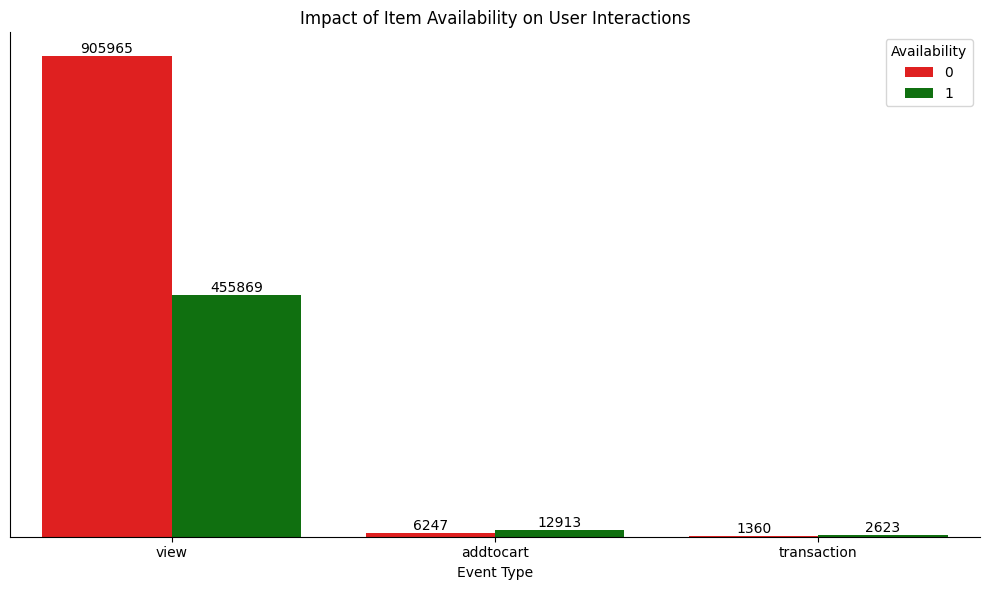

In [96]:
# Plot the comparison
plt.figure(figsize=(10, 6))
# Sort the data by count in descending order
availability_events_sorted = availability_events.sort_values('count', ascending=False)

ax = sns.barplot(x='event', y='count', hue='available', data=availability_events_sorted, palette={0: 'red', 1: 'green'}, order=availability_events_sorted['event'].unique())

# Add labels and title
plt.title("Impact of Item Availability on User Interactions")
plt.xlabel("Event Type")
plt.ylabel("Number of Events")
plt.legend(title='Availability')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

# Remove y-axis
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Remove y-axis ticks


# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

The output shows a bar chart titled "Impact of Item Availability on User Interactions" with separate bars for available (green) and unavailable (red) items for each event type. This visualization clearly shows that available items have a much higher number of all event types compared to unavailable items, highlighting the importance of item availability for user engagement

## Examine how conversion rates vary across different times of the day

In [97]:
# Create a copy to avoid SettingWithCopyWarning
final_df_copy = final_df.copy()

# Extract hour from timestamp
final_df_copy.loc[:, 'hour'] = final_df_copy['timestamp'].dt.hour

The hour of the day is extracted from the timestamp column and added as a new column hour.

Conversion rates are aggregated by hour. Two conversion rates are calculated for each hour:

conversion_view_to_add: Number of 'addtocart' events divided by the number of 'view' events for that hour.

conversion_add_to_purchase: Number of 'transaction' events divided by the number of 'addtocart' events for that hour.


In [98]:
# Aggregate conversion rates by hour
hourly_conversions = final_df_copy.groupby('hour', observed=False).agg(
    conversion_view_to_add=('event', lambda x: (x == 'addtocart').sum() / (x == 'view').sum() if (x == 'view').sum() > 0 else 0),
    conversion_add_to_purchase=('event', lambda x: (x == 'transaction').sum() / (x == 'addtocart').sum() if (x == 'addtocart').sum() > 0 else 0)
).reset_index()

# Display the result
print("Hourly conversion rates:")
display(hourly_conversions)

Hourly conversion rates:


,hour,conversion_view_to_add,conversion_add_to_purchase
0,0,0.01,0.20
1,1,0.01,0.18
2,2,0.01,0.19
3,3,0.01,0.19
4,4,0.01,0.20
5,5,0.01,0.19
6,6,0.01,0.20
7,7,0.01,0.19
8,8,0.01,0.16
9,9,0.01,0.16


### Reshape the data into a long format suitable for plotting multiple conversion rate types on the same graph.


In [99]:
# Reshape for plotting
hourly_conversions_long = hourly_conversions.melt(
    id_vars=['hour'],
    value_vars=['conversion_view_to_add', 'conversion_add_to_purchase'],
    var_name='conversion_type',
    value_name='rate'
)

## Visualize The Conversion Rates Over The Hours Of The Day

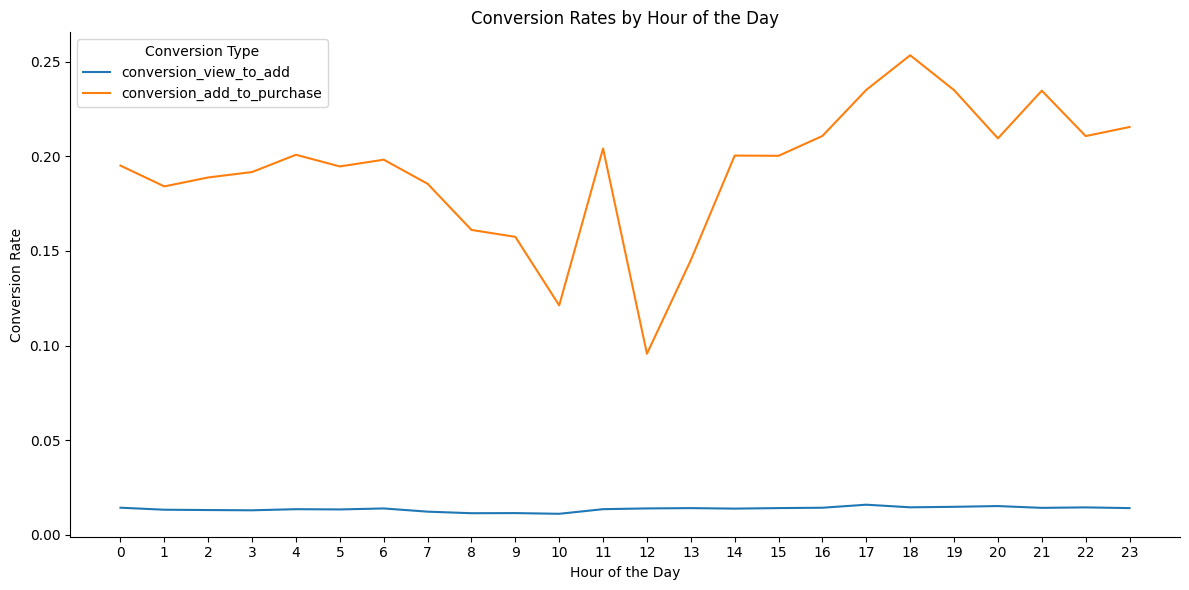

In [100]:
# Plot conversion rates over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_conversions_long, x='hour', y='rate', hue='conversion_type')

# Set x-axis ticks to show every hour
plt.xticks(range(0, 24))

# Add labels and title
plt.title("Conversion Rates by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Conversion Rate")
plt.legend(title='Conversion Type')

# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

The output shows a line graph titled "Conversion Rates by Hour of the Day". There are two lines, one for 'conversion_view_to_add' and one for 'conversion_add_to_purchase'. The x-axis represents the hour of the day. This plot allows to observe any patterns or peaks in conversion rates throughout the day.

## Understand The Relationship Between User Session Duration and Purchase Likelihood

Session statistics are calculated per user from the cleaned_events data (note that this part uses cleaned_events instead of final_df). This includes:

session_duration: The time difference between the first and last event for each user in minutes.

total_transactions: The total number of transaction events for each user.

total_views: The total number of view events for each user.

A conversion_rate (total transactions / total views) is calculated for each user, handling cases with zero views by setting the conversion rate to NaN.

Users with NaN conversion rates or session durations are then filtered out.



In [101]:
# Calculate session statistics per user
session_stats = cleaned_events.groupby('visitorid').agg(
    session_duration=('timestamp', lambda x: (x.max() - x.min()).total_seconds() / 60 if len(x) > 1 else 0), # Duration in minutes
    total_transactions=('event', lambda x: (x == 'transaction').sum()),
    total_views=('event', lambda x: (x == 'view').sum())
).reset_index()

# Calculate conversion_rate, handling division by zero and NA
session_stats['conversion_rate'] = np.where(
    session_stats['total_views'] > 0,
    session_stats['total_transactions'] / session_stats['total_views'],
    np.nan # Use NaN for cases where total_views is 0
)

# Filter out users with NA conversion_rate or session_duration
session_stats = session_stats.dropna(subset=['conversion_rate', 'session_duration'])

# Display the result
print("Session statistics per user:")
display(session_stats.head())

Session statistics per user:


,visitorid,session_duration,total_transactions,total_views,conversion_rate
0,0,5.46,0,3,0.00
1,1,0.00,0,1,0.00
2,10,0.00,0,1,0.00
3,100,3.98,0,4,0.00
4,1000,0.00,0,1,0.00


### Bin session durations

In [102]:
# Bin session durations using -Inf as the lower bound
# Using pd.cut with defined bins and labels
session_stats['duration_bin'] = pd.cut(session_stats['session_duration'],
                                       bins=[0, 5, 10, 20, 30, float('inf')],
                                       labels=['<5', '5-10', '10-20', '20-30', '30+'],
                                       include_lowest=True, right=True) # include_lowest=True to include 0 in the first bin

# Display the result
print("Session statistics with duration bins:")
display(session_stats.head())

Session statistics with duration bins:


,visitorid,session_duration,total_transactions,total_views,conversion_rate,duration_bin
0,0,5.46,0,3,0.00,5-10
1,1,0.00,0,1,0.00,<5
2,10,0.00,0,1,0.00,<5
3,100,3.98,0,4,0.00,<5
4,1000,0.00,0,1,0.00,<5


### Check The Binning Result

In [103]:
# Check the binning result (no NAs should appear)
print(session_stats['duration_bin'].value_counts(dropna=False))

duration_bin
<5       1148395
30+       142362
5-10       26847
10-20      19271
20-30       8723
Name: count, dtype: int64


### Summarise Average Conversion Rate For Each Duration Bin

In [104]:
# Summarise average conversion rate for each duration bin
bin_summary = session_stats.groupby('duration_bin', observed=False).agg(
    avg_conversion_rate=('conversion_rate', 'mean'),
    count=('visitorid', 'size') # or 'count' for non-null values
).reset_index()

# Display the result
print("Summary of average conversion rate by session duration bin:")
display(bin_summary)

Summary of average conversion rate by session duration bin:


,duration_bin,avg_conversion_rate,count
0,<5,0.00,1148395
1,5-10,0.03,26847
2,10-20,0.03,19271
3,20-30,0.02,8723
4,30+,0.01,142362


### Data Visualization The Average Conversion Rate By Session Duration Bin

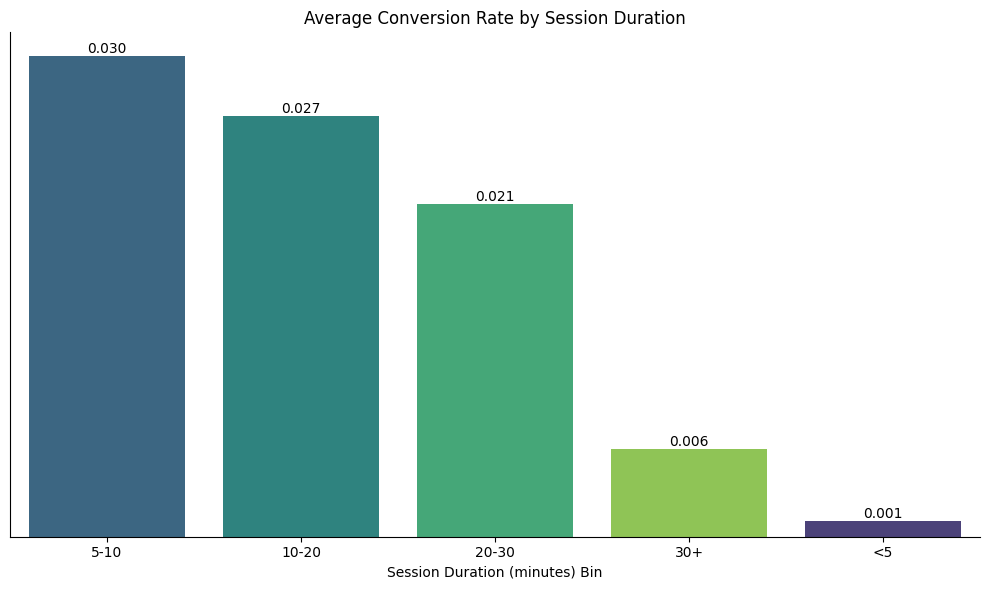

In [105]:
# Bar chart of average conversion rate by session duration bin
plt.figure(figsize=(10, 6))
# Sort the bin_summary DataFrame by average conversion rate in descending order
bin_summary_sorted = bin_summary.sort_values('avg_conversion_rate', ascending=False)

# Use the sorted duration_bin for the order in the barplot
ax = sns.barplot(x='duration_bin', y='avg_conversion_rate', data=bin_summary_sorted, palette='viridis', hue='duration_bin', legend=False, order=bin_summary_sorted['duration_bin'])

# Add labels and title
plt.title("Average Conversion Rate by Session Duration")
plt.xlabel("Session Duration (minutes) Bin")
plt.ylabel("Average Conversion Rate")

# Remove y-axis
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Remove y-axis ticks

# Add data labels
for container in ax.containers:
    labels = [f'{h:.3f}' if (h := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge')

# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

The output shows a bar plot titled "Average Conversion Rate by Session Duration". The x-axis represents the session duration bins, and the y-axis represents the average conversion rate. This plot helps understand if longer or shorter sessions are associated with higher conversion rates.


## Investigate The Distribution Of Event Types Across All Users

Aggregate the total counts for each event type ('view', 'addtocart', 'transaction') from the final_df

In [106]:
# Aggregate total counts per event type from the final dataset
event_distribution = final_df.groupby('event', observed=False).size().reset_index(name='total')

The overall sum of events is calculated below

In [107]:
# Calculate overall sum of events
overall_total = event_distribution['total'].sum()

The proportion of each event type is calculated by dividing the count of each event type by the overall total

In [108]:
# Calculate the proportion of each event type
event_distribution['proportion'] = event_distribution['total'] / overall_total

## Data Visualization Of Distribution Of Event Types Across Users

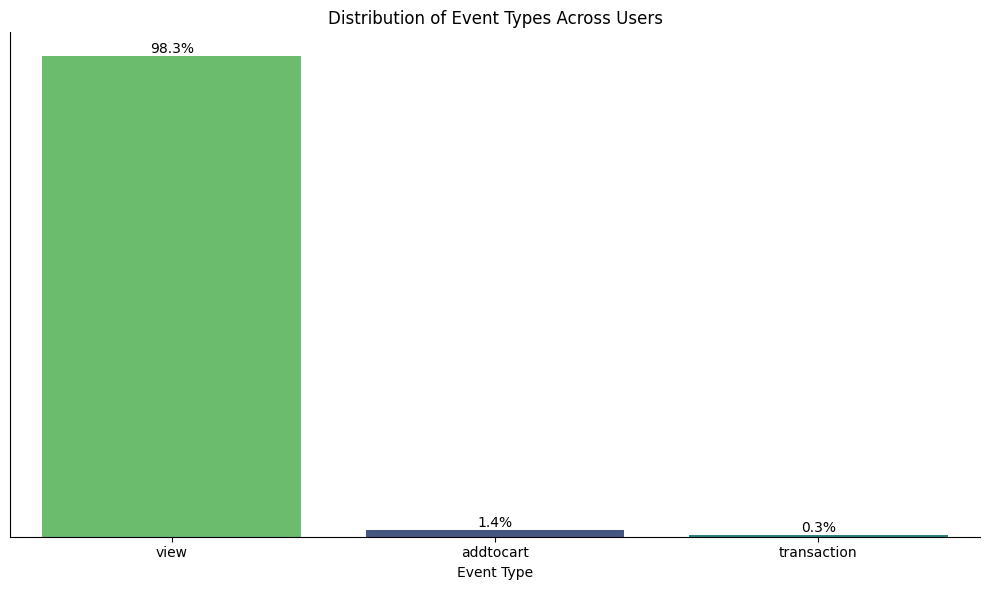

In [109]:
import matplotlib.ticker as mticker

# Plot the distribution as a bar chart with percentage labels
plt.figure(figsize=(10, 6))

# Sort the data by proportion in descending order
event_distribution_sorted = event_distribution.sort_values('proportion', ascending=False)

ax = sns.barplot(x='event', y='proportion', data=event_distribution_sorted, palette='viridis', hue='event', legend=False, order=event_distribution_sorted['event']) # Remove legend

# Format y-axis as percentages
# formatter = mticker.PercentFormatter(xmax=1.0)
# plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.title("Distribution of Event Types Across Users")
plt.xlabel("Event Type")
plt.ylabel("Proportion of Events") # Keep ylabel for clarity even if y-axis is removed

# Remove y-axis
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Remove y-axis ticks

# Add data labels
for container in ax.containers:
    labels = [f'{w:.1%}' if (w := v.get_height()) > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='edge')


# Use a minimalist theme
sns.despine()
plt.tight_layout()

# Show the plot
plt.show()

The bar chart titled "Distribution of Event Types Across Users", illustrates the percentage of each event type in the dataset. Similar to the earlier plot, this shows that 'view' events make up the vast majority of events.

## **Task 1**

When a customer comes to an e-commerce site, he looks for a product with particular properties: price range, vendor, product type and etc. These properties are implicit, so it's hard to determine them through clicks log. Try to create an algorithm which predicts properties of items in "addtocart" event by using data from "view" events for any visitor in the published log.

## MODELLING

### This section aims to build an algorithm to predict the category of an item added to the cart based on the items viewed by the same visitor before the "add to cart" event

Check for missing values in final_df_copy, which was used in the previous section for visualizations.

In [110]:
# Remove Na's in the final_df for memory optimisation
# Check NA's in columns
print(final_df_copy.isnull().sum())

timestamp             0
visitorid             0
event                 0
itemid                0
transactionid         0
property_timestamp    0
property              0
value                 0
categoryid            0
parentid              0
available             0
hour                  0
dtype: int64


The head and info of final_df_copy are also displayed, showing the columns and their data types.

In [111]:
final_df_copy.head()

,timestamp,visitorid,event,itemid,transactionid,property_timestamp,property,value,categoryid,parentid,available,hour
0,2015-05-10 03:00:09.663000107+00:00,350663,view,325406,0.00,2015-05-10 03:00:00+00:00,678,1115724,678,250.00,0,3
1,2015-05-10 03:00:10.854000092+00:00,826796,view,40046,0.00,2015-05-10 03:00:00+00:00,764,1285872,764,1370.00,0,3
2,2015-05-10 03:00:41.016000032+00:00,1368624,view,282472,0.00,2015-05-10 03:00:00+00:00,364,526701,364,711.00,0,3
3,2015-05-10 03:00:46.214999914+00:00,495446,view,112466,0.00,2015-05-10 03:00:00+00:00,112,679677,112,381.00,0,3
4,2015-05-10 03:00:58.815000057+00:00,1382836,view,277547,0.00,2015-05-10 03:00:00+00:00,893,n24.000,893,1615.00,0,3


In [112]:
final_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1384977 entries, 0 to 1612364
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype              
---  ------              --------------    -----              
 0   timestamp           1384977 non-null  datetime64[ns, UTC]
 1   visitorid           1384977 non-null  object             
 2   event               1384977 non-null  category           
 3   itemid              1384977 non-null  object             
 4   transactionid       1384977 non-null  float64            
 5   property_timestamp  1384977 non-null  datetime64[ns, UTC]
 6   property            1384977 non-null  object             
 7   value               1384977 non-null  object             
 8   categoryid          1384977 non-null  object             
 9   parentid            1384977 non-null  float64            
 10  available           1384977 non-null  int64              
 11  hour                1384977 non-null  int32              
dtypes: ca

### Import Necessary Libraries For Modeling

In [113]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer  # For bag-of-categories
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

A copy of final_df_copy is made and assigned to df.
The DataFrame df is filtered to include only 'view' and 'addtocart' events, as these are the events relevant to the prediction task.


In [114]:
# Make df the copy of final_df_copy
df = final_df_copy.copy()

# Step 1: Filter relevant events
df = df[(df['event'] == 'view') | (df['event'] == 'addtocart')]

 ## Prepare data for prediction

The code iterates through each visitor's events, grouped by visitorid.

For each visitor, the events are sorted by timestamp.
It identifies the indices of 'addtocart' events.

For each 'addtocart' event, it extracts all 'view' events that occurred before that specific 'addtocart' event.
If there were no prior 'view' events, the 'addtocart' event is skipped for prediction.

The categoryid values from these prior 'view' events are collected as a list of strings.

A simple feature representation is created: a single string where the viewed category IDs are joined by spaces. This is a "bag of categories" approach.

A list of dictionaries data is populated with these feature strings and target category IDs.

In [115]:
# Step 2: Prepare data for prediction
# We'll group by visitorid, sort by timestamp, and for each addtocart, use prior views to predict categoryid

data = []  # List to hold features and targets

# Group by visitorid
grouped = df.groupby('visitorid')

for visitor, group in grouped:
    # Sort by timestamp
    group = group.sort_values('timestamp').reset_index(drop=True)

    # Find indices of 'addtocart' events
    addtocart_indices = group[group['event'] == 'addtocart'].index

    for idx in addtocart_indices:
        # Get prior views (before this addtocart)
        prior_views = group.loc[:idx-1]  # All rows before the current addtocart
        prior_views = prior_views[prior_views['event'] == 'view']

        if len(prior_views) == 0:
            continue  # Skip if no prior views

        # Get list of categoryids from prior views
        viewed_categories = prior_views['categoryid'].astype(str).tolist()

        # Simple feature: 'bag of categories' as a space-separated string for CountVectorizer
        feature_str = ' '.join(viewed_categories)

        # Target: categoryid of the addtocart item
        target = str(group.at[idx, 'categoryid'])

        data.append({'features': feature_str, 'target': target})



**The target variable is the categoryid of the item in the current 'addtocart' event.**


The collected data is then converted into a pandas DataFrame pred_df.

In [116]:
# Convert to DataFrame
pred_df = pd.DataFrame(data)

## Feature Vectorization

A check is performed to see if pred_df is empty after preparing the data.
If pred_df is not empty, the notebook optionally filters the data to include only the top N most frequent categories in the target variable. This can help manage the complexity of the model by focusing on the most common categories. The threshold top_n is set to 100. A message is printed if no data remains after this filtering.


CountVectorizer is used to convert the 'bag of categories' strings into a numerical feature matrix (X). CountVectorizer creates a vocabulary of unique categories and represents each feature string as a vector where each element is the count of a specific category in the string.


In [117]:
# If no data, stop
if pred_df.empty:
    print("No suitable data for prediction.")
else:
    # Filter to top-N categories to reduce sparsity
    top_n = 100  # Adjust based on your needs
    top_categories = pred_df['target'].value_counts().head(top_n).index
    pred_df = pred_df[pred_df['target'].isin(top_categories)]

    if pred_df.empty:
        print("No data after filtering top categories.")
    else:
        # Step 3: Vectorize features
        vectorizer = CountVectorizer()
        X = vectorizer.fit_transform(pred_df['features'])
        y = pred_df['target']


## Split Data Into Training and Testing Sets

train_test_split divides the feature matrix X and target vector y into training and testing sets (X_train, X_test, y_train, y_test). The indices of the original pred_df are also split (train_idx, test_idx).
The sparse matrices X_train and X_test are converted to dense DataFrames, keeping the original indices.


In [118]:
        # Step 4: Split into train/test and keep indices
        X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(
            X, y, pred_df.index, test_size=0.2, random_state=42
        )

        # Convert to dense DataFrame
        X_train = pd.DataFrame(X_train.toarray(), index=train_idx)
        X_test = pd.DataFrame(X_test.toarray(), index=test_idx)

## Train Random Forest Classifier With Class Weighting

A RandomForestClassifier is initialized with 100 estimators and a random state for reproducibility. class_weight='balanced' is used to handle potential class imbalance in the target categories.
The model is fitted to the training data (X_train, y_train)

In [140]:
        # Step 5: Train a classifier with class weighting
        model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Predictions (y_pred) are made on the test set (X_test).
The accuracy of the model is calculated and printed.

In [141]:
        # Step 6: Predict and evaluate
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8568
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.64      0.20        11
         102       0.86      0.86      0.86         7
        1032       0.89      0.89      0.89         9
        1036       0.88      0.76      0.81        29
         104       0.50      1.00      0.67         3
        1066       0.86      1.00      0.92         6
        1075       0.80      0.80      0.80         5
        1092       0.50      0.50      0.50         2
         112       0.77      0.74      0.75        31
        1120       1.00      0.67      0.80         3
          12       1.00      0.80      0.89         5
        1261       1.00      1.00      1.00         2
        1277       0.50      0.50      0.50         2
        1355       1.00      0.50      0.67         2
        1509       0.71      1.00      0.83         5
         159       0.86      0.80      0.83        30
         161       1.00      1.00      1.

A classification report is printed, providing metrics like precision, recall, and f1-score for each category, as well as overall averages. The report shows varying performance across different categories, with some having high precision and recall, while others (especially those with fewer examples) perform poorly.

## Implement a simple baseline

This is done for each test case, predict the most frequent category among the items viewed before the add-to-cart event.

The accuracy of this baseline model is calculated and printed.

In [142]:
        # Step 7: Baseline - most frequent category per visitor
        baseline_preds = []
        for idx in X_test.index:  # Use X_test.index to get the correct indices from the filtered data
            feature_str = pred_df['features'].loc[idx] # Use .loc with the index
            cats = feature_str.split()
            if cats:
                most_common = Counter(cats).most_common(1)[0][0]
                baseline_preds.append(most_common)
            else:
                baseline_preds.append('unknown')

        baseline_accuracy = accuracy_score(y_test, baseline_preds)
        print(f"Baseline Accuracy (Most Frequent Category): {baseline_accuracy:.4f}")

Baseline Accuracy (Most Frequent Category): 0.8298


The output shows a Baseline Accuracy (Most Frequent Category) of 0.8298. Comparing this to the Random Forest model's accuracy (0.8568) indicates that the Random Forest model provides a modest improvement over simply predicting the most viewed category.


## Visualize Confusion Matrix

In [143]:
        # Import libray for Confusion Matrix plot
        from sklearn.metrics import confusion_matrix

To make the Confusion Matrix readable it is generated only for the top 20 categories based on their frequency in the test set.

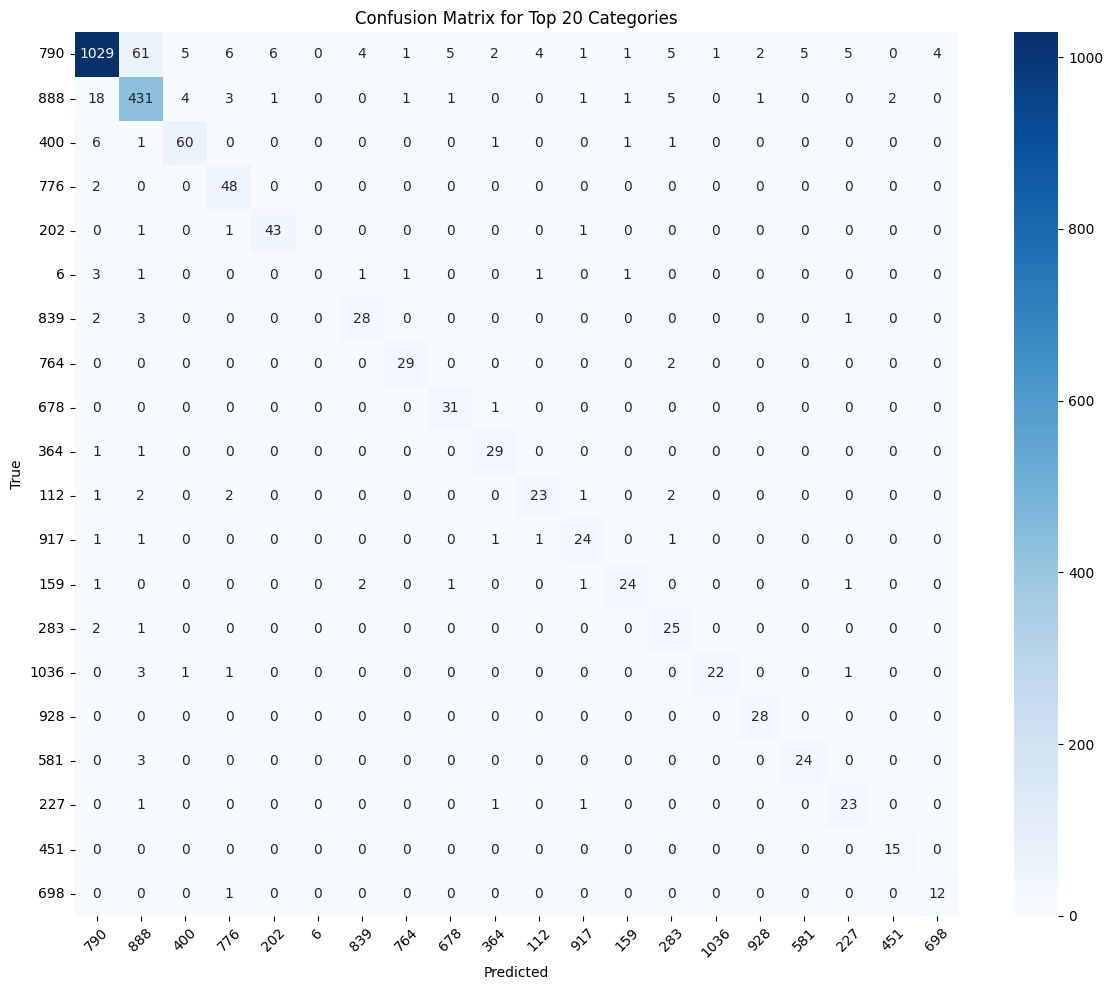

In [144]:
        # Step 8: Visualize confusion matrix for top-N categories
        top_n_classes = pd.Series(y_test).value_counts().head(20).index  # Top 20 categories by support
        mask = [label in top_n_classes for label in y_test]
        y_test_top = y_test[mask]
        y_pred_top = y_pred[mask]

        plt.figure(figsize=(12, 10))
        cm = confusion_matrix(y_test_top, y_pred_top, labels=top_n_classes)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=top_n_classes, yticklabels=top_n_classes)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix for Top 20 Categories')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

The output shows a heatmap representing the confusion matrix, with true labels on the y-axis and predicted labels on the x-axis. The numbers in the cells indicate the count of instances where a true category was predicted as a specific category. This visualization helps understand which categories are being predicted correctly and where the model is making mistakes (e.g., confusing similar categories).


In [124]:
        import joblib

        # Step 9: Save the model
        model_filename = 'random_forest_model.joblib'
        joblib.dump(model, model_filename)
        print(f"Model saved as {model_filename}")

        # Save the vectorizer to use the same feature space later
        vectorizer_filename = 'count_vectorizer.joblib'
        joblib.dump(vectorizer, vectorizer_filename)
        print(f"Vectorizer saved as {vectorizer_filename}")

Model saved as random_forest_model.joblib
Vectorizer saved as count_vectorizer.joblib


The trained RandomForestClassifier model is saved to a file named random_forest_model.joblib using joblib.
The fitted CountVectorizer is saved to a file named count_vectorizer.joblib.

## Deeper Dive into Anomaly Detection: Evaluate Bot Removal Impact
Quantify and visualize the impact of removing the flagged bot users on key metrics and analyze the characteristics of the identified bots.

In [125]:
# Calculate key metrics for the original data (before bot removal)
original_event_counts = events.groupby('event', observed=False).size().reset_index(name='count')
original_total_events = original_event_counts['count'].sum()
original_conversion_funnel = events.groupby('event', observed=False).size().reindex(["view", "addtocart", "transaction"]).fillna(0)
original_view_to_add_conversion_rate = original_conversion_funnel.get('addtocart', 0) / original_conversion_funnel.get('view', 0) if original_conversion_funnel.get('view', 0) > 0 else 0
original_add_to_transaction_conversion_rate = original_conversion_funnel.get('transaction', 0) / original_conversion_funnel.get('addtocart', 0) if original_conversion_funnel.get('addtocart', 0) > 0 else 0

print("Metrics Before Bot Removal:")
print(f"Total Events: {original_total_events}")
print(f"View to Add Conversion Rate: {original_view_to_add_conversion_rate:.4f}")
print(f"Add to Transaction Conversion Rate: {original_add_to_transaction_conversion_rate:.4f}")
display(original_event_counts)

Metrics Before Bot Removal:
Total Events: 2755641
View to Add Conversion Rate: 0.0259
Add to Transaction Conversion Rate: 0.3256


,event,count
0,addtocart,68966
1,transaction,22457
2,view,2664218


In [126]:
# Calculate key metrics for the cleaned data (after bot removal)
cleaned_event_counts = cleaned_events.groupby('event', observed=False).size().reset_index(name='count')
cleaned_total_events = cleaned_event_counts['count'].sum()
cleaned_conversion_funnel = cleaned_event_counts.set_index('event').reindex(["view", "addtocart", "transaction"]).fillna(0)['count']
cleaned_view_to_add_conversion_rate = cleaned_conversion_funnel.get('addtocart', 0) / cleaned_conversion_funnel.get('view', 0) if cleaned_conversion_funnel.get('view', 0) > 0 else 0
cleaned_add_to_transaction_conversion_rate = cleaned_conversion_funnel.get('transaction', 0) / cleaned_conversion_funnel.get('addtocart', 0) if cleaned_conversion_funnel.get('addtocart', 0) > 0 else 0


print("\nMetrics After Bot Removal:")
print(f"Total Events: {cleaned_total_events}")
print(f"View to Add Conversion Rate: {cleaned_view_to_add_conversion_rate:.4f}")
print(f"Add to Transaction Conversion Rate: {cleaned_add_to_transaction_conversion_rate:.4f}")
display(cleaned_event_counts)


Metrics After Bot Removal:
Total Events: 1922379
View to Add Conversion Rate: 0.0134
Add to Transaction Conversion Rate: 0.2139


,event,count
0,addtocart,25390
1,transaction,5431
2,view,1891558


### Visualize Comparison of Event Distribution Before and After Bot Removal

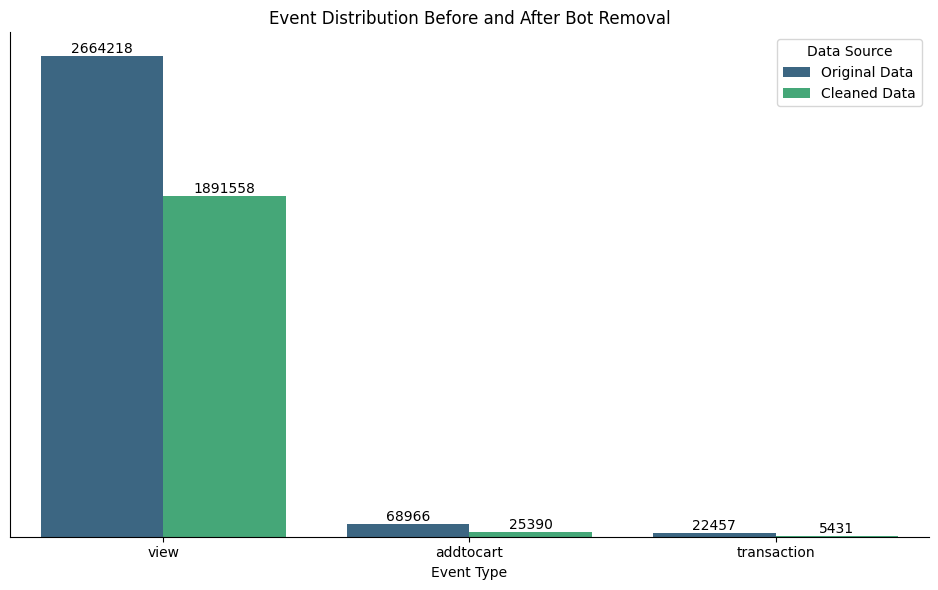

In [127]:
# Combine event counts for plotting
event_counts_comparison = pd.concat([original_event_counts.assign(Source='Original Data'),
                                     cleaned_event_counts.assign(Source='Cleaned Data')])

# Sort the combined data by count in descending order
event_counts_comparison_sorted = event_counts_comparison.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
# Specify the order of event types based on the sorted data
ax = sns.barplot(x='event', y='count', hue='Source', data=event_counts_comparison_sorted, palette='viridis', order=event_counts_comparison_sorted['event'].unique())
plt.title("Event Distribution Before and After Bot Removal")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.legend(title='Data Source')
sns.despine()
plt.tight_layout()

# Remove y-axis
ax.yaxis.set_visible(False)
ax.tick_params(axis='y', which='both', length=0) # Remove y-axis ticks

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')

plt.show()

Analyze Characteristics of Flagged Bots
Focus on the distribution of total events and average time difference specifically for the flagged bot users.


Characteristics of Flagged Bots:


,total_events,avg_time_diff
count,58627.00,58627.00
mean,14.21,166030.28
std,60.21,323941.12
min,6.00,0.03
25%,7.00,215.04
50%,8.00,15802.33
75%,12.00,159600.61
max,7757.00,2333695.29


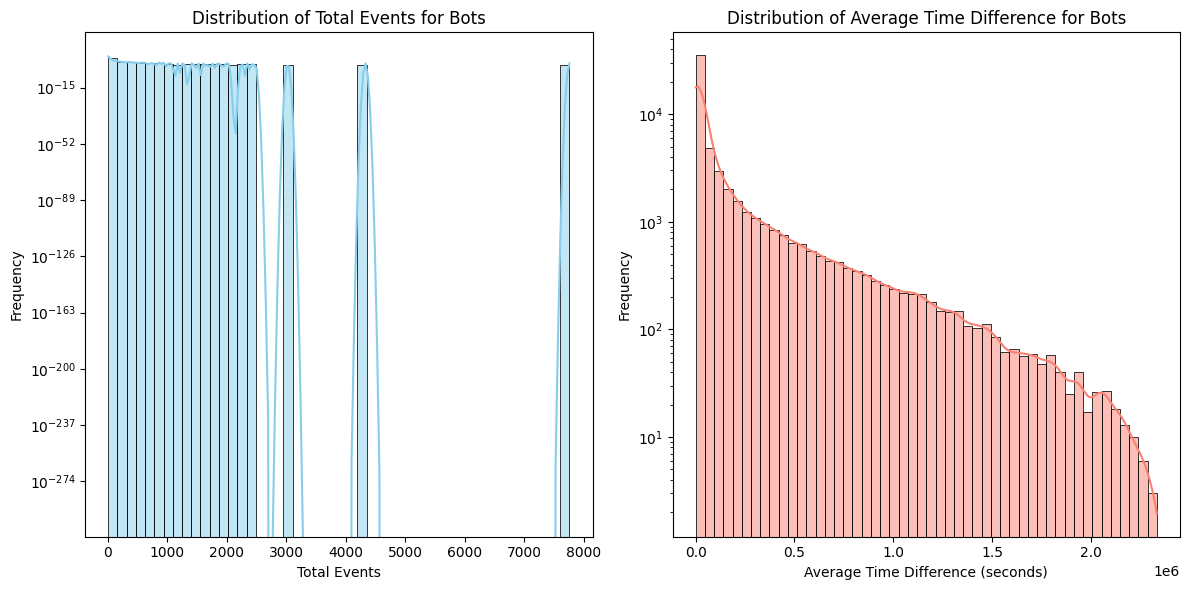

In [128]:
# Use'bot_users' DataFrame from earlier analysis
if not bot_users.empty:
    print("\nCharacteristics of Flagged Bots:")
    display(bot_users[['total_events', 'avg_time_diff']].describe())

    # Visualize distributions for bots
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(bot_users['total_events'], bins=50, kde=True, color='skyblue')
    plt.title('Distribution of Total Events for Bots')
    plt.xlabel('Total Events')
    plt.ylabel('Frequency')
    plt.yscale('log') # Log scale for frequency due to potential outliers

    plt.subplot(1, 2, 2)
    sns.histplot(bot_users['avg_time_diff'], bins=50, kde=True, color='salmon')
    plt.title('Distribution of Average Time Difference for Bots')
    plt.xlabel('Average Time Difference (seconds)')
    plt.ylabel('Frequency')
    plt.yscale('log') # Log scale for frequency due to potential outliers

    plt.tight_layout()
    plt.show()
else:
    print("Bot users DataFrame is empty. Cannot analyze characteristics.")

## Export files for App Development

In [130]:
#Export CSV file
df.to_csv('final_data.csv', index=False)

In [145]:
#Export the trained model
from sklearn.ensemble import RandomForestClassifier
import joblib

# Save the model
model_filename = 'item_prediction_model.pkl'
joblib.dump(model, model_filename, compress=3)
print(f"Model saved as {model_filename}")

Model saved as item_prediction_model.pkl


In [132]:
# Export the vectorizer
vectorizer_filename = 'count_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_filename)
print(f"Vectorizer saved as {vectorizer_filename}")

Vectorizer saved as count_vectorizer.pkl
